In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from tqdm.auto import tqdm
from utils_gent_measure import *
import os
from ABM_MeanField_Cells.utils import *


np.set_printoptions(linewidth=400)

%matplotlib inline

#set a nice seaborn style
sns.set()
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("whitegrid")
sns.set_context("talk")

#ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)


width = height = 7




/home/gmauro/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=width*height)

In [3]:
# Variables
num_agents = 2**12  # Set the number of agents (default: 10000)
mode = "improve"
size = "big"  #can be "big" or ""
starting_deployment = f"centre_segr-{size}"  # Set the starting deployment (default: "centre_segr")


# Base directory where the results are stored
directory = f"out/batch_results/{mode}/{starting_deployment}/{num_agents}agents/"
directory_exps = directory + "exps/"
intermediate_dir = os.path.join(directory, "intermediate")

print(directory_exps)
os.makedirs(f"out/plots/{starting_deployment}/{num_agents}", exist_ok=True)


out/batch_results/improve/centre_segr-big/4096agents/exps/


# Gs barplots

In [4]:
p_g_list = [0.0, 0.01, 0.05, 0.1, 0.15]


h_list = [20]
delta_list = [15]


pg2frac_gamma = defaultdict(list)
pg2frac_chi = defaultdict(list)

pg2steps = defaultdict(list)



# Iterate through all p_g values in the p_g_list
for p_g in tqdm(p_g_list):
    p_g_str = f"pg_{p_g}_"

    # Iterate through all h values
    for h in h_list:
        h_str = f"h_{h}_"

        for delta in delta_list:
            delta_str = f"delta_{delta}_"
            # Iterate through all files in the intermediate directory OVER ALL DELTAS
            for file_name in os.listdir(intermediate_dir):
                if  p_g_str in file_name and h_str in file_name and delta_str in file_name:
                    file_path = os.path.join(intermediate_dir, file_name)
                    df = pd.read_csv(file_path, index_col=0)
                    #df.fillna(0, inplace=True)

                    if "net_avg_prod" in file_name:
                        gentrified_gmma_cells_run = []
                        for cell in df.columns:
                            peaks_gmma = find_peaks_custom(df[cell].reset_index(drop=True))
                            if len(peaks_gmma) >0:
                                gentrified_gmma_cells_run.append(cell)

                        gentri_fraction_gmma = len(gentrified_gmma_cells_run) / len(df.columns)
                        pg2frac_gamma[p_g].append(gentri_fraction_gmma)

                    if "chi_hat" in file_name:
                        gentrified_dummy_cells_run = []
                        for cell in df.columns:
                            peaks_dummy = find_shifts(df[cell].reset_index(drop=True))
                            if len(peaks_dummy) >0:
                                gentrified_dummy_cells_run.append(cell)
                            
                        pg2steps[p_g].append(len(df))

                        gentri_fraction_dummy = len(gentrified_dummy_cells_run) / len(df.columns)
                        pg2frac_chi[p_g].append(gentri_fraction_dummy)





100%|██████████| 5/5 [00:38<00:00,  7.77s/it]


In [5]:
%%script false --no-raise-error
random_directory = f"out/batch_results/random/{starting_deployment}/{num_agents}agents/"
random_directory_exps = random_directory + "exps/"
random_intermediate_dir = os.path.join(random_directory, "intermediate")


#random baseline! Only 0.01 for p_g
p_g_list = [0.01]


h_list = [20]
delta_list = [15]


pg2frac_gamma_random = defaultdict(list)
pg2frac_chi_random = defaultdict(list)

pg2steps_random = defaultdict(list)



# Iterate through all p_g values in the p_g_list
for p_g in tqdm(p_g_list):
    p_g_str = f"pg_{p_g}_"

    # Iterate through all h values
    for h in h_list:
        h_str = f"h_{h}_"

        for delta in delta_list:
            delta_str = f"delta_{delta}_"
            # Iterate through all files in the intermediate directory OVER ALL DELTAS
            for file_name in os.listdir(random_intermediate_dir):
                if  p_g_str in file_name and h_str in file_name and delta_str in file_name:
                    file_path = os.path.join(random_intermediate_dir, file_name)
                    df = pd.read_csv(file_path, index_col=0)
                    #df.fillna(0, inplace=True)

                    if "net_avg_prod" in file_name:
                        gentrified_gmma_cells_run = []
                        for cell in df.columns:
                            peaks_gmma = find_peaks_custom(df[cell].reset_index(drop=True))
                            if len(peaks_gmma) >0:
                                gentrified_gmma_cells_run.append(cell)

                        gentri_fraction_gmma = len(gentrified_gmma_cells_run) / len(df.columns)
                        pg2frac_gamma_random[p_g].append(gentri_fraction_gmma)

                    if "chi_hat" in file_name:
                        gentrified_dummy_cells_run = []
                        for cell in df.columns:
                            peaks_dummy = find_shifts(df[cell].reset_index(drop=True))
                            if len(peaks_dummy) >0:
                                gentrified_dummy_cells_run.append(cell)
                            
                        pg2steps_random[p_g].append(len(df))

                        gentri_fraction_dummy = len(gentrified_dummy_cells_run) / len(df.columns)
                        pg2frac_chi_random[p_g].append(gentri_fraction_dummy)





In [6]:
%%script false --no-raise-error
randomdest_directory = f"out/batch_results/randomdest/{starting_deployment}/{num_agents}agents/"
randomdest_directory_exps = randomdest_directory + "exps/"
randomdest_intermediate_dir = os.path.join(randomdest_directory, "intermediate")

p_g_list = [0.0, 0.01, 0.05, 0.1, 0.15]

h_list = [20]
delta_list = [15]


pg2frac_gamma_randomdest = defaultdict(list)
pg2frac_chi_randomdest = defaultdict(list)

pg2steps_randomdest = defaultdict(list)


#iterate through all p_g values in the p_g_list

for p_g in tqdm(p_g_list):
    p_g_str = f"pg_{p_g}_"

    # Iterate through all h values
    for h in h_list:
        h_str = f"h_{h}_"

        for delta in delta_list:
            delta_str = f"delta_{delta}_"
            # Iterate through all files in the intermediate directory OVER ALL DELTAS
            for file_name in os.listdir(randomdest_intermediate_dir):
                if  p_g_str in file_name and h_str in file_name and delta_str in file_name:
                    file_path = os.path.join(randomdest_intermediate_dir, file_name)
                    df = pd.read_csv(file_path, index_col=0)
                    #df.fillna(0, inplace=True)

                    if "net_avg_prod" in file_name:
                        gentrified_gmma_cells_run = []
                        for cell in df.columns:
                            peaks_gmma = find_peaks_custom(df[cell].reset_index(drop=True))
                            if len(peaks_gmma) >0:
                                gentrified_gmma_cells_run.append(cell)

                        gentri_fraction_gmma = len(gentrified_gmma_cells_run) / len(df.columns)
                        pg2frac_gamma_randomdest[p_g].append(gentri_fraction_gmma)

                    if "chi_hat" in file_name:
                        gentrified_dummy_cells_run = []
                        for cell in df.columns:
                            peaks_dummy = find_shifts(df[cell].reset_index(drop=True))
                            if len(peaks_dummy) >0:
                                gentrified_dummy_cells_run.append(cell)
                            
                        pg2steps_randomdest[p_g].append(len(df))

                        gentri_fraction_dummy = len(gentrified_dummy_cells_run) / len(df.columns)
                        pg2frac_chi_randomdest[p_g].append(gentri_fraction_dummy)

                        




In [7]:
def create_boxplot(ax, data_dict, ylabel, xlabel, yticks=False, title=None):
    p_g_values = list(data_dict.keys())
    values = list(data_dict.values())

    spacing = 0.3  # Increase the spacing between boxes
    positions = np.arange(len(p_g_values)) * spacing

    # Create color palette
    palette = sns.color_palette("CMRmap_r", len(p_g_values))

    bp = ax.boxplot(values, positions=positions, widths=0.2, 
                    boxprops=dict(linewidth=2, zorder=2),
                    whiskerprops=dict(linewidth=2), 
                    capprops=dict(linewidth=2))

    # Set median colors based on the palette
    for i, median in enumerate(bp['medians']):
        median.set_color(palette[i])
        median.set_linewidth(3)
        median.set_zorder(3)  # Ensure median is on top

    ax.set_xticks(positions)
    ax.set_xticklabels([f'{p_g:.2f}' for p_g in p_g_values], fontsize=32)
    ax.set_xlim(-0.2, spacing * (len(p_g_values) - 1) + 0.2)
    ax.set_xlabel(xlabel, fontsize=36)

    if yticks:
        ax.set_yticks(np.linspace(0, 1, 6))
        ax.set_yticklabels([f'{int(i * 100)}' for i in np.linspace(0, 1, 6)], fontsize=32)
        ax.set_ylabel(ylabel, fontsize=32)
    else:
        #ticks from 0 to 300
        ax.set_yticks(np.linspace(0, 300, 7))
        ax.set_yticklabels([f'{int(i)}' for i in np.linspace(0, 300, 7)], fontsize=32)
        ax.set_ylabel(ylabel, fontsize=32)
    
    ax.grid(alpha=0.5, linestyle='--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(width=2)
    
    # Customize spines color and width
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')

    if title:
        #set the title in the top left corner
        ax.text(-0.08, 1.05, title, fontsize = 32, fontweight='bold', transform=ax.transAxes)

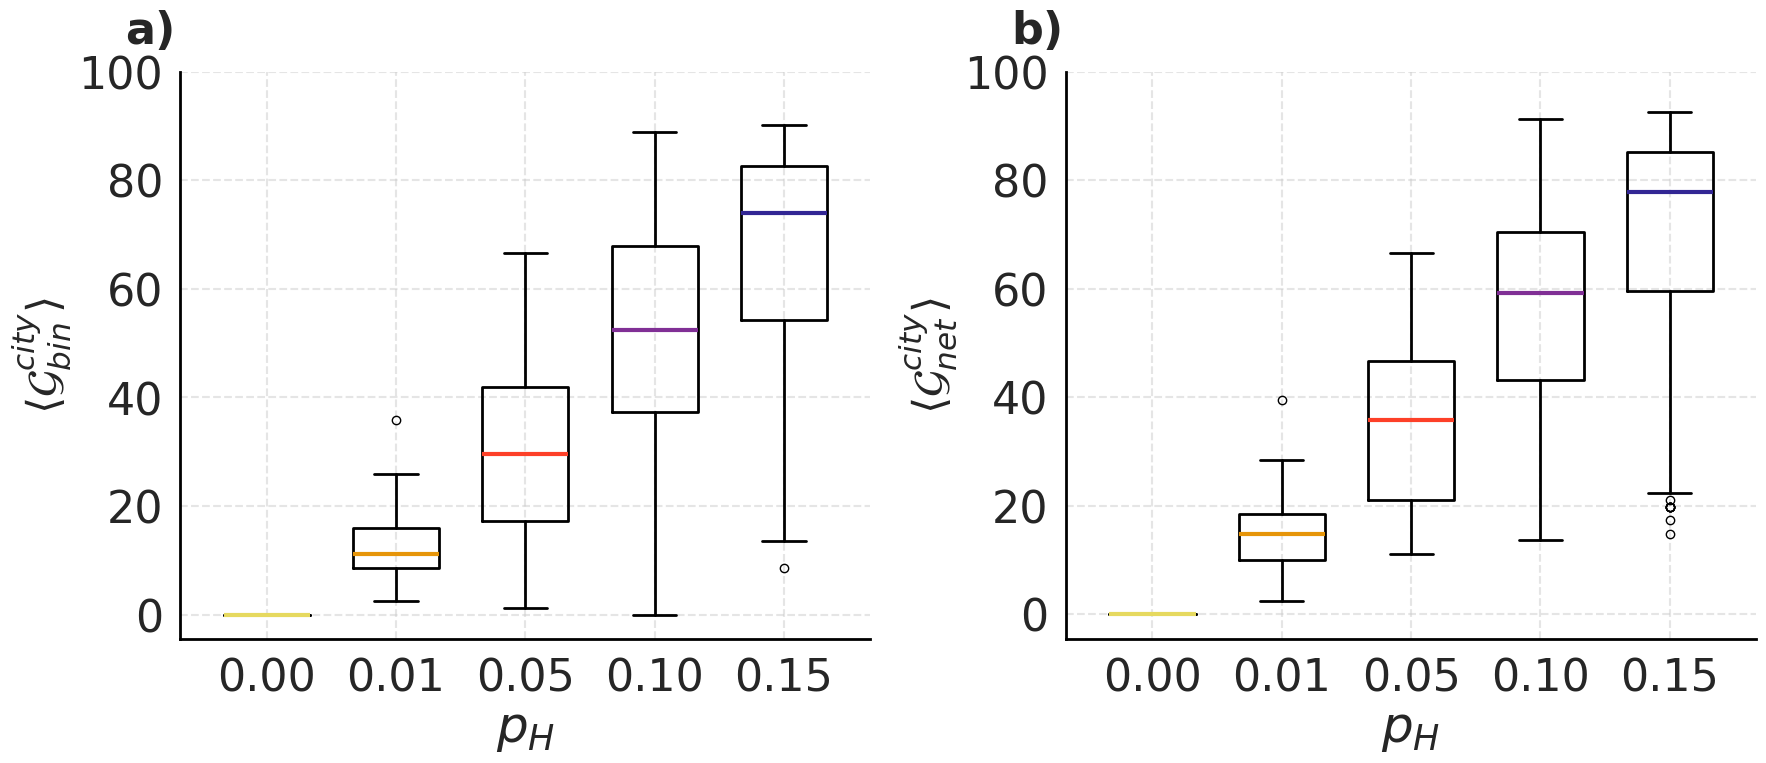

In [8]:
# Create a multi-plot figure
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# First row: leave the center empty
create_boxplot(axs[0], pg2frac_chi, r'$ \langle \mathcal{G}_{bin}^{city}   \rangle   $', '$p_H$', yticks=True, title="a)")
create_boxplot(axs[1], pg2frac_gamma, r'$ \langle \mathcal{G}_{net}^{city}   \rangle   $', '$p_H$', yticks=True, title="b)")


plt.tight_layout()
#plt.suptitle(f"Gentr. num agents = {num_agents}", fontsize=32)

plt.savefig(f"out/plots/{starting_deployment}/{num_agents}/{size}_boxplot_all_BI.pdf", bbox_inches='tight')

plt.show()

In [9]:
%%script false --no-raise-error
# Create a multi-plot figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# First row: leave the center empty
# Add the random data box plot
create_boxplot(axs[0], pg2frac_chi_random, r'$ \langle \mathcal{G}_{bin}^{city}   \rangle   $', '$random$', yticks=True, title="a)")
create_boxplot(axs[1], pg2frac_gamma_random, r'$ \langle \mathcal{G}_{net}^{city}   \rangle   $', '$random$', yticks=True, title="b)")



plt.tight_layout()
plt.suptitle(f"RANDOM: Gentr. num agents = {num_agents}", fontsize=32, fontweight='bold', y=1.05)


plt.show()

In [10]:
%%script false --no-raise-error
# Create a multi-plot figure
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# First row: leave the center empty
# Add the random data box plot
create_boxplot(axs[0], pg2frac_chi_randomdest, r'$ \langle \mathcal{G}_{bin}^{city}   \rangle   $', '$p_H$', yticks=True, title="a)")
create_boxplot(axs[1], pg2frac_gamma_randomdest, r'$ \langle \mathcal{G}_{net}^{city}   \rangle   $', '$p_H$', yticks=True, title="b)")



plt.tight_layout()
plt.suptitle(f"RANDOMDEST: Gentr. num agents = {num_agents}", fontweight='bold', y=1.05)


plt.show()

In [11]:
stop

NameError: name 'stop' is not defined

# Changing density

In [12]:
p_g_list = [0.0, 0.01, 0.05, 0.1, 0.15]
h_list = [20]
delta_list = [15]

nagents2frac_gamma = defaultdict(lambda: defaultdict(list))
nagents2frac_chi = defaultdict(lambda: defaultdict(list))
pg2steps = defaultdict(lambda: defaultdict(list))

for n_agents in tqdm([2**x for x in range(7, 13)]):
    intermediate_dir = f"out/batch_results/{mode}/centre_segr-{size}/{n_agents}agents/intermediate"
        
    # Iterate through all p_g values in the p_g_list
    for p_g in p_g_list:
        p_g_str = f"pg_{p_g}_"

        # Iterate through all h values
        for h in h_list:
            h_str = f"h_{h}_"

            for delta in delta_list:
                delta_str = f"delta_{delta}_"
                # Iterate through all files in the intermediate directory OVER ALL DELTAS
                for file_name in os.listdir(intermediate_dir):
                    if  p_g_str in file_name and h_str in file_name and delta_str in file_name:
                        file_path = os.path.join(intermediate_dir, file_name)
                        df = pd.read_csv(file_path, index_col=0)

                        if "net_avg_prod" in file_name:
                            gentrified_gamma_cells_run = []
                            for cell in df.columns:
                                peaks_gmma = find_peaks_custom(df[cell].reset_index(drop=True))
                                if len(peaks_gmma) > 0:
                                    gentrified_gamma_cells_run.append(cell)

                            gentri_fraction_gmma = len(gentrified_gamma_cells_run) / len(df.columns)
                            nagents2frac_gamma[n_agents][p_g].append(gentri_fraction_gmma)

                        if "chi_hat" in file_name:
                            gentrified_dummy_cells_run = []
                            for cell in df.columns:
                                peaks_dummy = find_shifts(df[cell].reset_index(drop=True))
                                if len(peaks_dummy) > 0:
                                    gentrified_dummy_cells_run.append(cell)
                                
                            pg2steps[n_agents][p_g].append(len(df))

                            gentri_fraction_dummy = len(gentrified_dummy_cells_run) / len(df.columns)
                            nagents2frac_chi[n_agents][p_g].append(gentri_fraction_dummy)

100%|██████████| 6/6 [02:21<00:00, 23.57s/it]


In [13]:
def plot_measures_multiple(ax, p_g_list, nagents2frac, ylabel, legend=False):

    # Set the color palette
    palette = sns.color_palette("CMRmap_r", len(p_g_list))

    # Iterate through each p_g and plot the corresponding line
    for i, p_g in enumerate(p_g_list):
        # Prepare data
        n_agents = list(nagents2frac.keys())
        averages = [np.mean(nagents2frac[n][p_g]) * 100 for n in n_agents]  # Multiply by 100 for percentage
        std_devs = [np.std(nagents2frac[n][p_g]) * 100 for n in n_agents]  # Multiply by 100 for percentage

        # Create a DataFrame for Seaborn
        df = pd.DataFrame({
            'n_agents': n_agents,
            'average': averages,
            'std_dev': std_devs,
            'p_g': [p_g] * len(n_agents)
        })

        # Plot using Seaborn
        sns.lineplot(ax=ax, x='n_agents', y='average', data=df, marker='o', label=f'$p_H = {p_g}$', color=palette[i], legend=legend, linewidth = 1, markersize = 5)

    ax.set_xscale('log')
    # Customize the x-axis to show powers of 2 nicely

    ax.set_ylabel(ylabel)
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_ylim(-3, 100)

    if legend:
        # Customize the legend with a visible frame styled like the axes
        leg = ax.legend(title='', fontsize=7, frameon=True, ncol=1)
        frame = leg.get_frame()
        frame.set_edgecolor('darkgrey')  # Set the frame color to black like the axis
        frame.set_linewidth(.5)        # Set the frame width to 2 like the axis spines


    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(width=2)


def plot_steps_multiple(ax, p_g_list, pg2steps):

    palette = sns.color_palette("CMRmap_r", len(p_g_list))

    # Iterate through each p_g and plot the corresponding line
    for i, p_g in enumerate(p_g_list):
        # Prepare data
        n_agents = list(pg2steps.keys())
        averages = [np.mean(pg2steps[n][p_g]) for n in n_agents]
        std_devs = [np.std(pg2steps[n][p_g]) for n in n_agents]

        # Create a DataFrame for Seaborn
        df = pd.DataFrame({
            'n_agents': n_agents,
            'average': averages,
            'std_dev': std_devs,
            'p_g': [p_g] * len(n_agents)
        })

        # Plot using Seaborn
        sns.lineplot(ax=ax, x='n_agents', y='average', data=df, marker='o', label=f'$p_h = {p_g}$', color=palette[i], legend=False, linewidth = 1, markersize = 5)

    ax.set_xscale('log')
    # Customize the x-axis to show powers of 2 nicely
    ax.set_xticks(n_agents)
    ax.set_xticklabels([f'$2^{{{int(np.log2(n))}}}$' for n in n_agents])

    # Style the plot
    ax.set_ylabel(r'$ \langle T \rangle $')

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


/tmp/ipykernel_2322385/2389441703.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


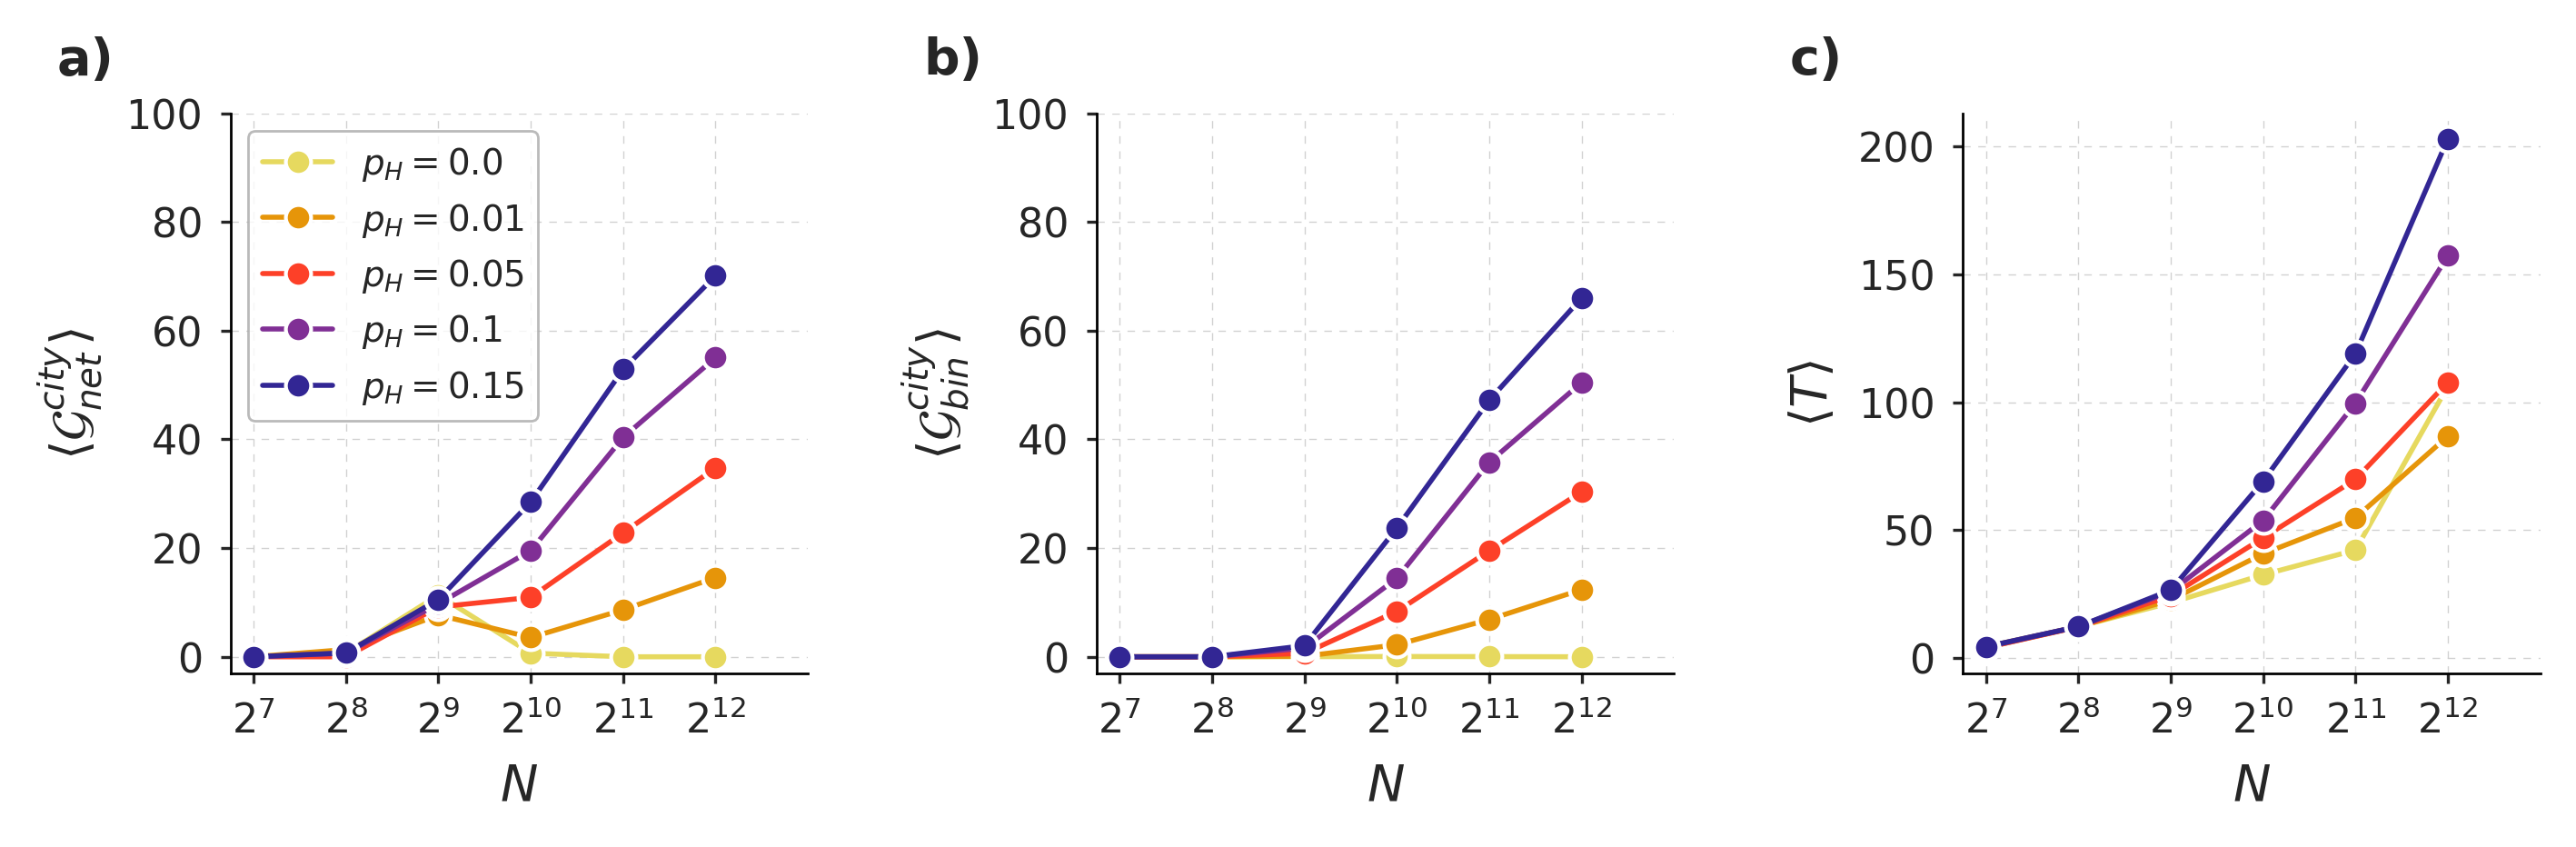

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(8.2, 2), gridspec_kw={'wspace': 0.5}, dpi=400)

# Define the common x-ticks for each x-axis (adjust as needed)
n_agents = list(nagents2frac_gamma.keys())  # Assuming nagents2frac_gamma contains relevant agents data
shared_xticks = n_agents  # Modify if you have a different range of x-axis values

# Plot the first measure
plot_measures_multiple(axs[0], p_g_list, nagents2frac_gamma, r'$ \langle \mathcal{G}_{net}^{city}   \rangle   $', legend=True)

# Plot the second measure
plot_measures_multiple(axs[1], p_g_list, nagents2frac_chi, r'$ \langle \mathcal{G}_{bin}^{city}   \rangle   $', legend=False)

# Plot the third plot for steps
plot_steps_multiple(axs[2], p_g_list, pg2steps)

# Set x-axis label for each subplot
for ax in axs:
    ax.set_xlabel(r'$N$', fontsize=10)

# Set consistent grid, tick params, y-label sizes, and spines for each plot
for ax in axs:
    ax.set_xlabel(r'$N$', fontsize=10)
    
    # Set x-scale to logarithmic with base 2
    ax.set_xscale('log', base=2)
    
    # Set ticks for powers of 2 from 2^7 to 2^13
    ax.set_xticks([2**i for i in range(7, 14)])
    
    
    ax.set_xticks(shared_xticks)
    ax.grid(True, linestyle='dashed', dashes=(6, 6), alpha=0.9, linewidth=0.25)
    ax.tick_params(axis='both', bottom=True, left=True, labelsize=8, length=2, width=0.6)
    
    # Set the y-axis label size to match reduced dimensions
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)
    
    # Customize spines color and width
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)

# Set titles in the top left corner for each subplot
axs[0].text(-0.3, 1.07, "a)", fontsize=10, fontweight='bold', transform=axs[0].transAxes)
axs[1].text(-0.3, 1.07, "b)", fontsize=10, fontweight='bold', transform=axs[1].transAxes)
axs[2].text(-0.3, 1.07, "c)", fontsize=10, fontweight='bold', transform=axs[2].transAxes)


# Adjust layout and save the figure
plt.tight_layout()
plt.savefig(f"out/plots/{starting_deployment}/{size}-several_agents_horizontal.pdf", bbox_inches='tight')
plt.show()

In [16]:
stop

NameError: name 'stop' is not defined

# Median & Measure

In [4]:
starting_deployment = "centre_segr"
num_agents = 2**11

directory = f"out/batch_results/{starting_deployment}/{num_agents}agents"
intermediate_dir = os.path.join(directory, "intermediate")
exp_directory = os.path.join(directory, "exps")
os.makedirs(f"out/plots/{starting_deployment}/{num_agents}", exist_ok=True)


In [5]:
p_g = 0.01
h = 20
rep = 18
delta = 15

p_g_str = f"pg_{p_g}_"
h_str = f"h_{h}_"
rep_str = f"rep_{rep}_"
delta_str = f"delta_{delta}_"

In [6]:
chi_hat_filename = f"{p_g_str}{h_str}{rep_str}{delta_str}results_chi_hat.csv"
gamma_filename = f"{p_g_str}{h_str}{rep_str}{delta_str}results_net_avg_prod.csv"
chi_filename = f"{p_g_str}{h_str}{rep_str}{delta_str}results_chi.csv"
exec_model_filename = f"{p_g_str}{h_str}{rep_str}results_model.csv"
exec_agents_filename = f"{p_g_str}{h_str}{rep_str}results_agents.csv"

df_chi_hat = pd.read_csv(os.path.join(intermediate_dir, chi_hat_filename), index_col=0)
df_gamma = pd.read_csv(os.path.join(intermediate_dir, gamma_filename), index_col=0)
df_chi = pd.read_csv(os.path.join(intermediate_dir, chi_filename), index_col=0)
df_exec_model = pd.read_csv(os.path.join(exp_directory, exec_model_filename), index_col=0)

#from chi_hat_filename, remove the part after the REP
df = read_df_agents(os.path.join(exp_directory, exec_agents_filename))
mass = range(df["pos"].max()[0] + 1)
num_steps = max(df["Step"])
all_sources = [(o, d) for o in mass for d in mass]

df_cell_median = get_median_richness_df(df_exec_model, all_sources)


/home/gmauro/Gent_Network/ABM_MeanField_Cells/utils.py:447: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cell_median["median_richness_matrix"] = df_cell_median["median_richness_matrix"].apply(lambda x: str_to_np_array(x))
/home/gmauro/Gent_Network/ABM_MeanField_Cells/utils.py:449: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cell_median["median_richness_matrix"] = df_cell_median["median_richness_matrix"].apply(lambda x: list(x.flatten()))


In [7]:
#cast df_gamma_columns to tuple
df_gamma.columns = [eval(x) for x in df_gamma.columns]


In [8]:
import colorcet as cc
sns.set()
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("whitegrid")
sns.set_context("talk")


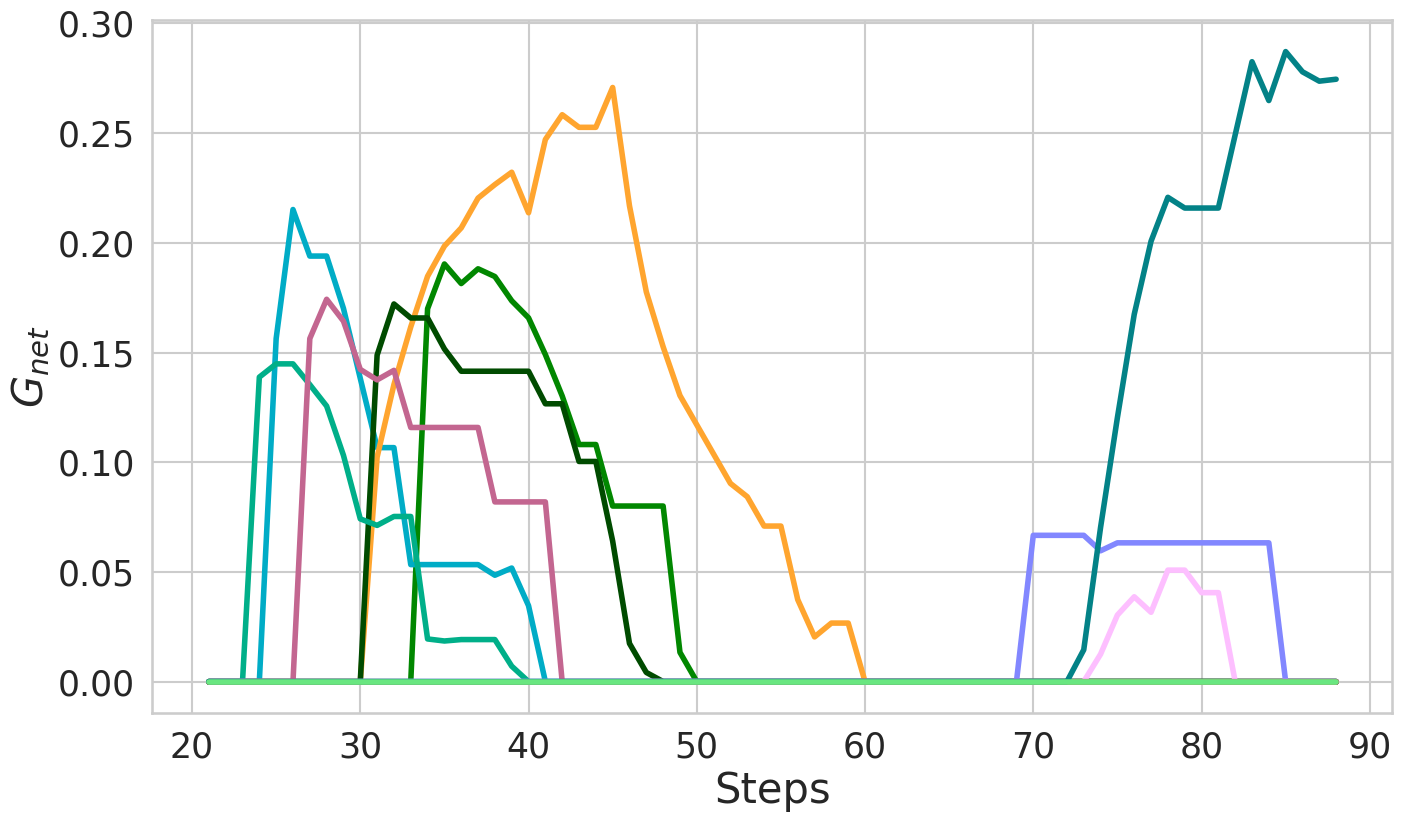

In [9]:
sns.lineplot(data = df_gamma, palette = palette, dashes = False, legend = False, linewidth = 4)

plt.ylabel(r"$G_{{net}}$", fontsize=30);
plt.xlabel("Steps", fontsize=30);
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);

#plt.xlim(21, end)



In [10]:
start = 0
#end = len(df_gamma)
end = 81

#select the first 75 steps of df_gamma
df_gamma_end = df_gamma.iloc[start:end]

#substitute nan with 0
df_gamma_end.fillna(0, inplace=True)

#select the columns whose sum is greater than 0
df_gamma_end = df_gamma_end.loc[:, (df_gamma_end.sum(axis=0) > 0)]

df_gamma_end.head()


/tmp/ipykernel_1959254/3246329708.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gamma_end.fillna(0, inplace=True)


,"(0, 2)","(0, 3)","(1, 0)","(2, 6)","(4, 6)","(5, 0)","(5, 3)","(6, 2)","(6, 5)"
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
palette = palette[:len(df_gamma_end.columns)]

In [12]:
df_median_end = df_cell_median.iloc[start:end]

#select the columns that are in df_gamma_end
df_median_end_common = df_median_end[df_gamma_end.columns]

#select the columns that are not in df_gamma_end
df_median_end_not_common = df_median_end.drop(columns = df_gamma_end.columns)







In [13]:
num_columns = len(df_median_end_not_common.columns)

# Create a palette of grey colors with the length of the number of columns
grey_palette = ["#808080"] * num_columns  # "#808080" is a mid-grey color

red_palette = ["darkred"] * num_columns



In [14]:
import colorcet as cc
sns.set()
sns.set(rc={'figure.figsize':(16,9)})
sns.set_style("whitegrid")
sns.set_context("talk")

#palette = sns.color_palette(cc.glasbey_dark, n_colors=len(df_gamma_end.columns)+1)
#palette = sns.color_palette("husl", n_colors =len(df_gamma_end.columns))


palette = sns.color_palette(n_colors=len(df_gamma_end.columns))

if len(palette) >7:

    if len(palette) > 10:
        palette = sns.color_palette(n_colors=len(df_gamma_end.columns)+2)
        palette.pop(10)
        palette.pop(7)

    else:
        palette = sns.color_palette(n_colors=len(df_gamma_end.columns)+1)
        palette.pop(7)



print(len(palette))
palette

9


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [15]:
start,end

(0, 81)

/tmp/ipykernel_1959254/600675265.py:34: UserWarning: The palette list has more values (40) than needed (9), which may not be intended.
  sns.lineplot(data=df_median_end_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=1.5, ax=axes[1], alpha = 0.8)
/tmp/ipykernel_1959254/600675265.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


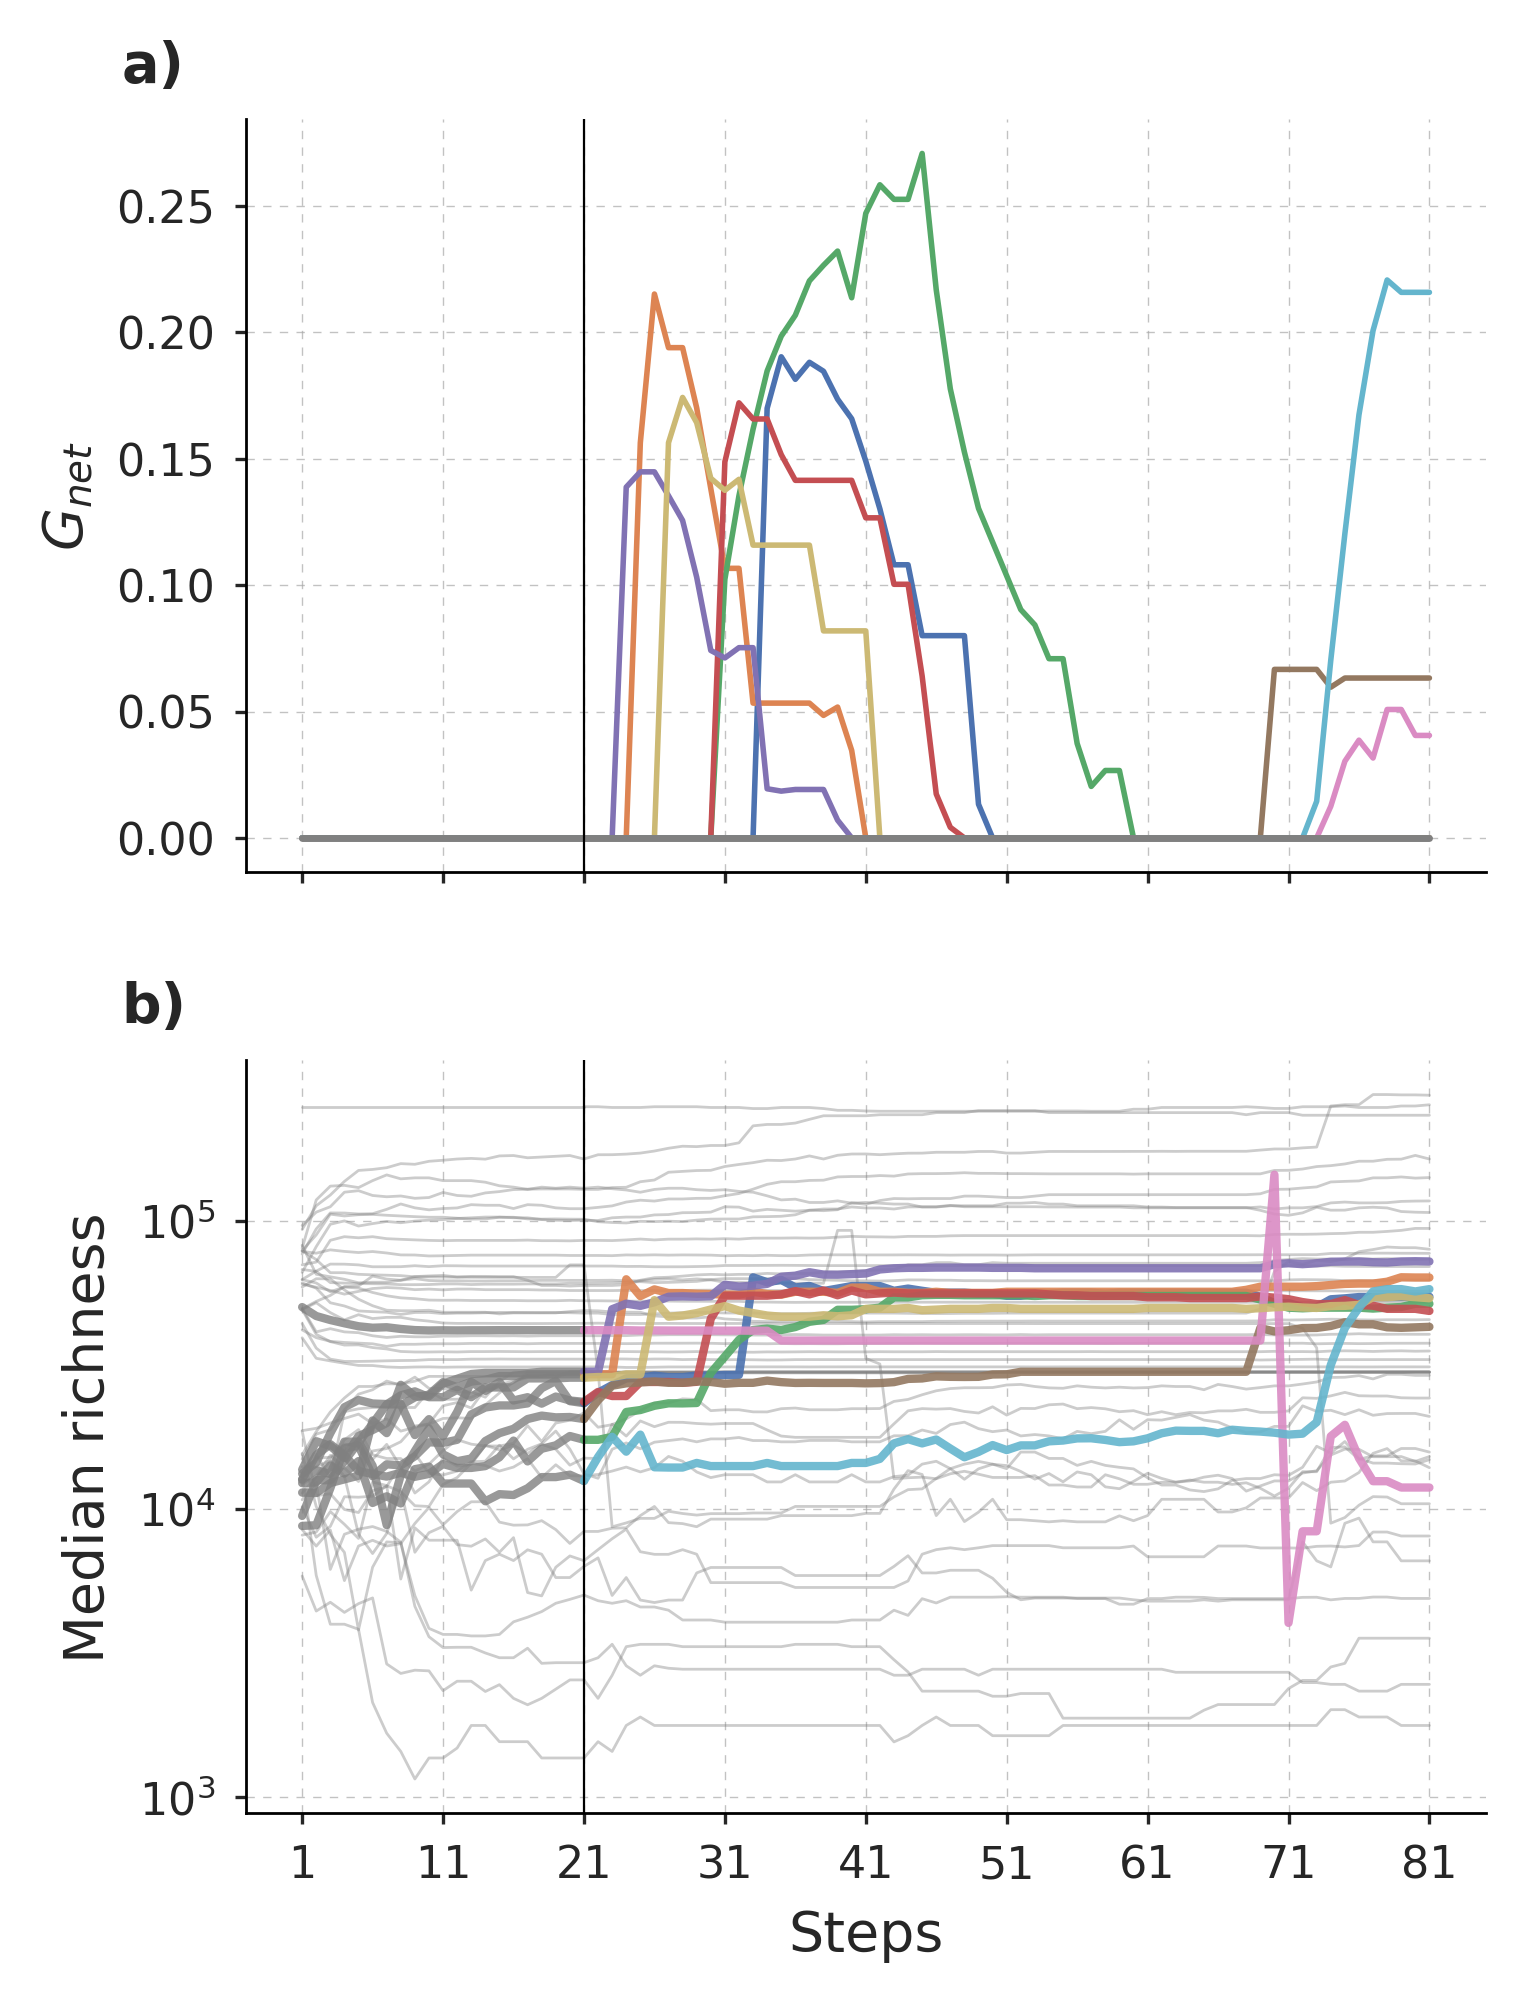

In [16]:
# Split the dataframes at x=21

# Define the x-limit to split the data
split_x = 21

# Split the dataframes for the grey and colored parts
df_median_end_not_common_grey = df_median_end_not_common[df_median_end_not_common.index <= split_x]
df_median_end_not_common_color = df_median_end_not_common[df_median_end_not_common.index >= split_x]

df_median_end_common_grey = df_median_end_common[df_median_end_common.index <= split_x]
df_median_end_common_color = df_median_end_common[df_median_end_common.index >= split_x]

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(4, 5.5), gridspec_kw={'hspace': 0.25}, sharex=True, dpi=400)  # Vertical layout

# Define a common set of x-ticks for both plots
shared_ticks = list(range(start+1, end+5, 10))  # Adjust according to your data range

### Second Plot (Now Up) - $G_{net}$
sns.lineplot(data=df_gamma_end, palette=palette, dashes=False, legend=False, linewidth=1, ax=axes[0])

# Add a grey horizontal line at y=0, starting from x = 1 and ending at end
axes[0].plot([start + 1, end], [0, 0], color='grey', linewidth=1.25, linestyle='-')

# Customize y-axis, grid, and ticks for the first plot (was second)
axes[0].set_ylabel(r"$G_{{net}}$", fontsize=10)
axes[0].tick_params(axis='both', bottom=True , left = True, labelsize=8, length = 2, width = 0.6)
axes[0].set_xticks(shared_ticks)
axes[0].grid(True, linestyle='dashed', dashes=(6,6), alpha = 0.7, linewidth=0.25, color = "darkgrey" )
axes[0].axvline(x=21, color='black', linestyle='solid', linewidth=.4)

### First Plot (Now Down) - Median richness
sns.lineplot(data=df_median_end_not_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=0.5, alpha=0.4, ax=axes[1])
sns.lineplot(data=df_median_end_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=1.5, ax=axes[1], alpha = 0.8)

# Colored Part
sns.lineplot(data=df_median_end_not_common_color, palette=grey_palette, dashes=False, legend=False, linewidth=0.5, alpha=0.4, ax=axes[1])
sns.lineplot(data=df_median_end_common_color, palette=palette, dashes=False, legend=False, linewidth=1.5, ax=axes[1], alpha = 0.9)

# Customize y-axis, grid, and ticks for the second plot (was first)
axes[1].set_yscale("log")
axes[1].set_ylabel("Median richness", fontsize=10)
axes[1].set_xlabel("Steps", fontsize=10)
axes[1].tick_params(axis='both', bottom=True , left = True, labelsize=8, length = 2, width = 0.6)
axes[1].set_xticks(shared_ticks)
axes[1].grid(True, linestyle='dashed', dashes=(6,6), alpha = 0.7, linewidth=0.25, color = "darkgrey" )
axes[1].axvline(x=21, color='black', linestyle='solid', linewidth=.4)

### Spines and legend adjustments
sns.despine()

#black x axis and y axis
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['left'].set_color('black')

#reduce the width of the x and y axis
axes[0].spines['bottom'].set_linewidth(0.5)
axes[0].spines['left'].set_linewidth(0.5)
axes[1].spines['bottom'].set_linewidth(0.5)
axes[1].spines['left'].set_linewidth(0.5)

# Adjust subplot labels after swapping
axes[0].text(-0.1, 1.05, "a)", fontsize=10, fontweight='bold', transform=axes[0].transAxes)
axes[1].text(-0.1, 1.05, "b)", fontsize=10, fontweight='bold', transform=axes[1].transAxes)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig(f"out/plots/{starting_deployment}/{num_agents}/richness_net.pdf", bbox_inches='tight')
# Display the combined plot
plt.show()


/tmp/ipykernel_1959254/4067232966.py:21: UserWarning: The palette list has more values (40) than needed (9), which may not be intended.
  sns.lineplot(data=df_median_end_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=1.5, ax=axes[0], alpha = 0.8)
/tmp/ipykernel_1959254/4067232966.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


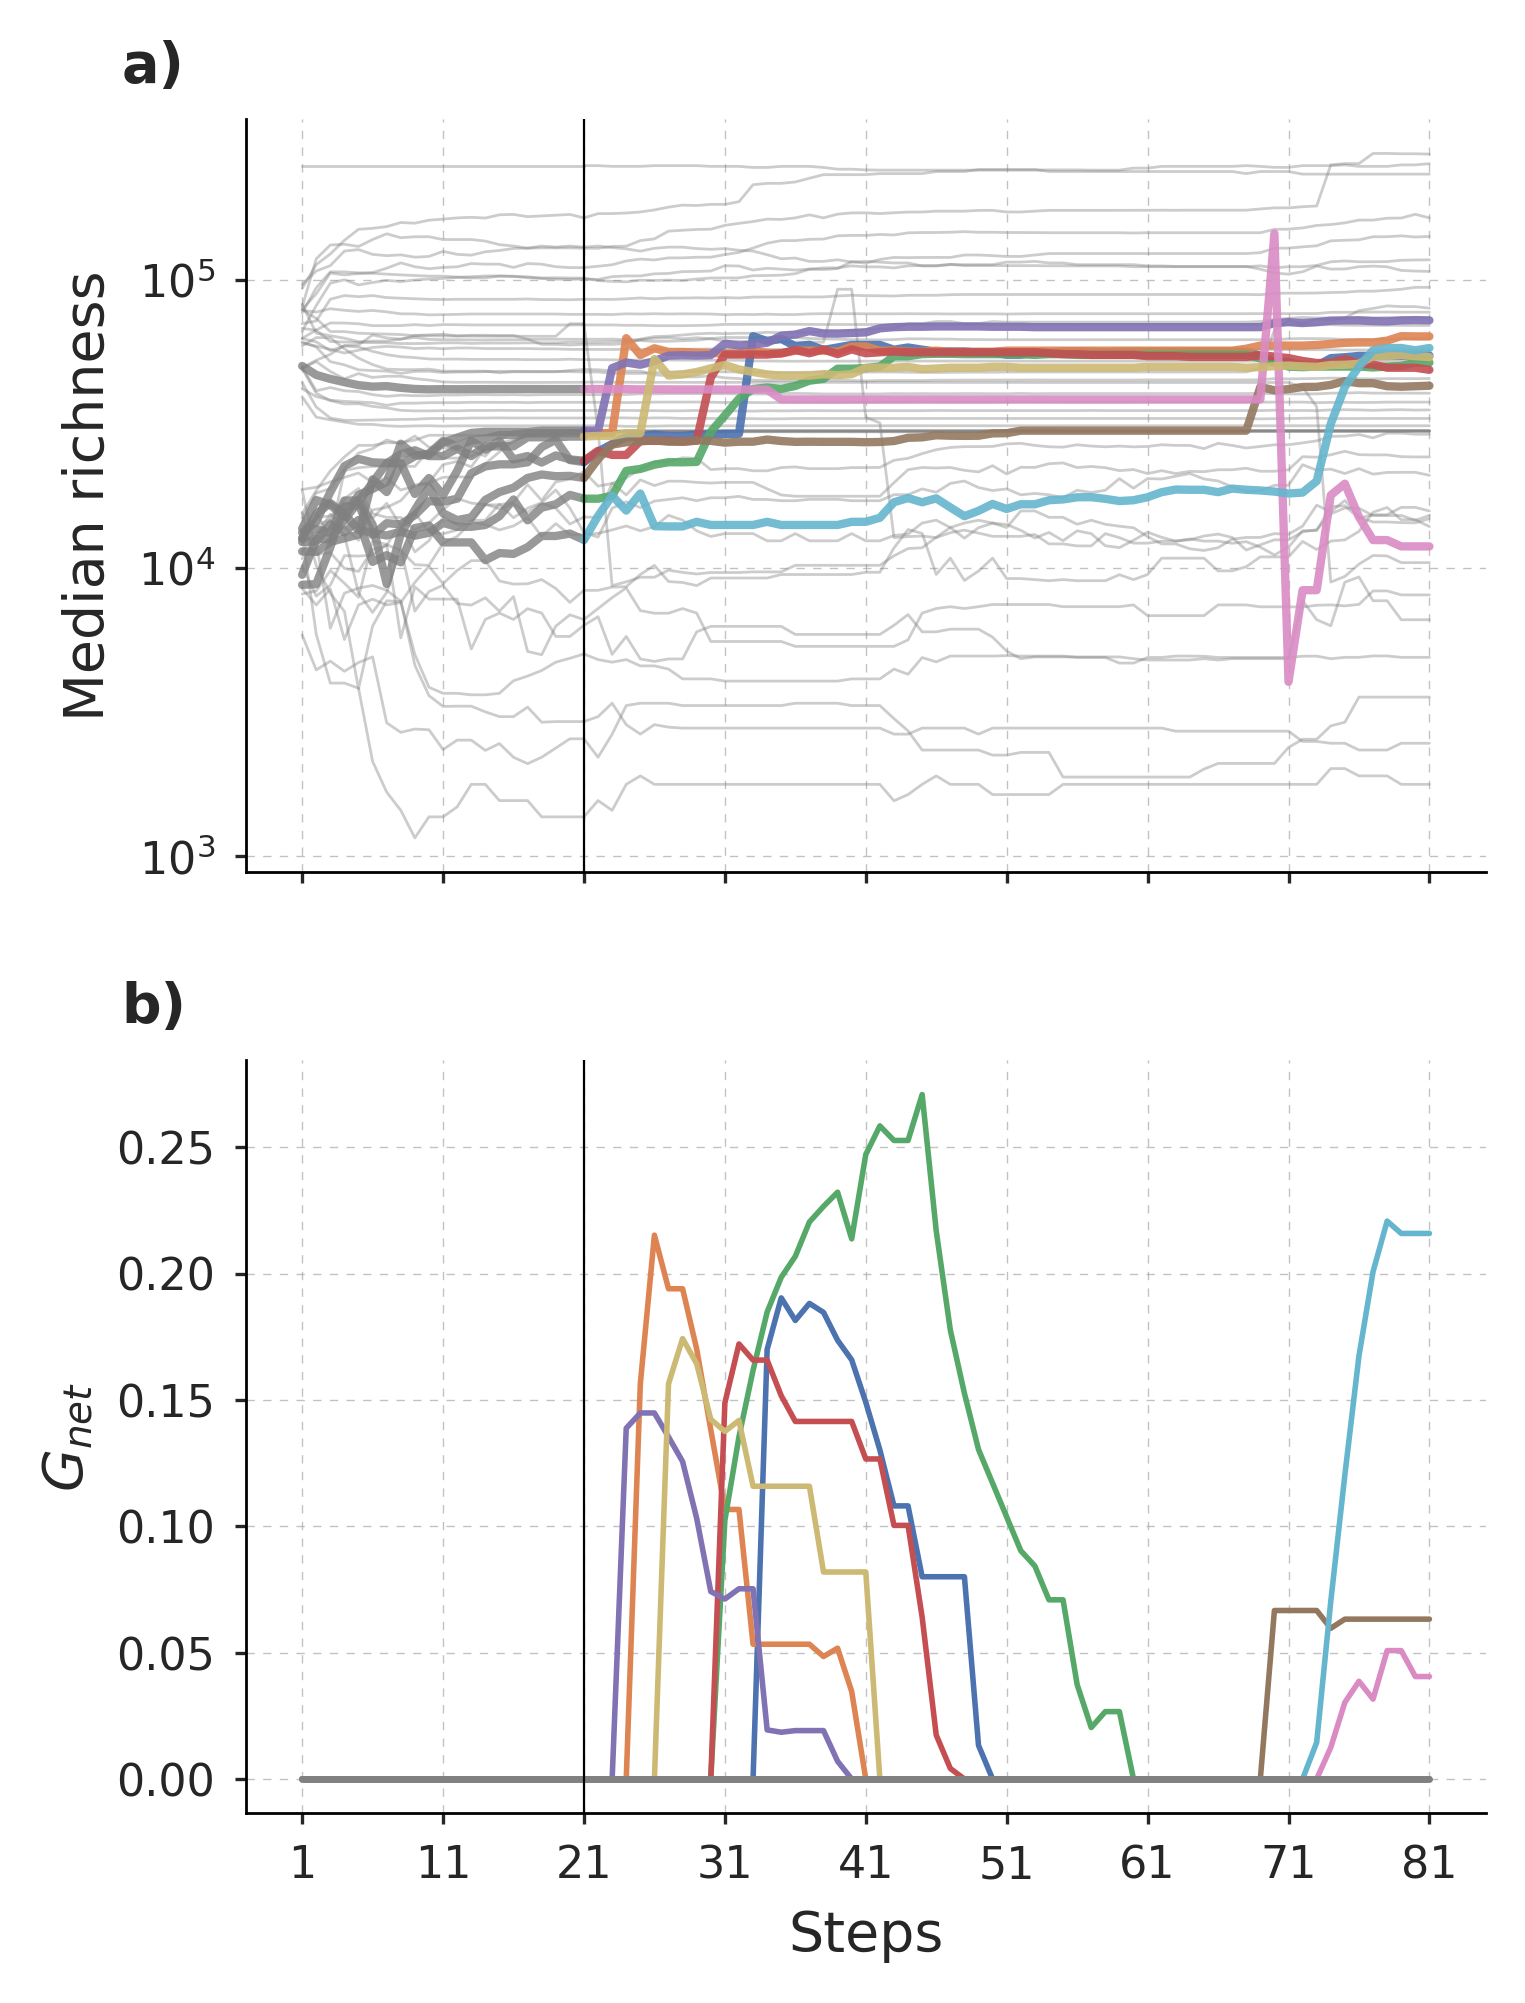

In [19]:
# Split the dataframes at x=21

# Define the x-limit to split the data
split_x = 21

# Split the dataframes for the grey and colored parts
df_median_end_not_common_grey = df_median_end_not_common[df_median_end_not_common.index <= split_x]
df_median_end_not_common_color = df_median_end_not_common[df_median_end_not_common.index >= split_x]

df_median_end_common_grey = df_median_end_common[df_median_end_common.index <= split_x]
df_median_end_common_color = df_median_end_common[df_median_end_common.index >= split_x]

# Create figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(4, 5.5), gridspec_kw={'hspace': 0.25}, sharex=True, dpi=400)  # Vertical layout

# Define a common set of x-ticks for both plots
shared_ticks = list(range(start+1, end+5, 10))  # Adjust according to your data range

### First Plot (Now Up) - Median richness
sns.lineplot(data=df_median_end_not_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=0.5, alpha=0.4, ax=axes[0])
sns.lineplot(data=df_median_end_common_grey, palette=grey_palette, dashes=False, legend=False, linewidth=1.5, ax=axes[0], alpha = 0.8)

# Colored Part
sns.lineplot(data=df_median_end_not_common_color, palette=grey_palette, dashes=False, legend=False, linewidth=0.5, alpha=0.4, ax=axes[0])
sns.lineplot(data=df_median_end_common_color, palette=palette, dashes=False, legend=False, linewidth=1.5, ax=axes[0], alpha = 0.9)

# Customize y-axis, grid, and ticks for the first plot
axes[0].set_yscale("log")
axes[0].set_ylabel("Median richness", fontsize=10)
axes[0].tick_params(axis='both', bottom=True , left = True, labelsize=8, length = 2, width = 0.6)
axes[0].set_xticks(shared_ticks)
axes[0].grid(True, linestyle='dashed', dashes=(6,6), alpha = 0.7, linewidth=0.25, color = "darkgrey" )
axes[0].axvline(x=21, color='black', linestyle='solid', linewidth=.4)

### Second Plot (Now Down) - $G_{net}$
sns.lineplot(data=df_gamma_end, palette=palette, dashes=False, legend=False, linewidth=1, ax=axes[1])

# Add a grey horizontal line at y=0, starting from x = 1 and ending at end
axes[1].plot([start + 1, end], [0, 0], color='grey', linewidth=1.25, linestyle='-')

# Customize y-axis, grid, and ticks for the second plot
axes[1].set_ylabel(r"$G_{{net}}$", fontsize=10)
axes[1].set_xlabel("Steps", fontsize=10)
axes[1].tick_params(axis='both', bottom=True , left = True, labelsize=8, length = 2, width = 0.6)
axes[1].set_xticks(shared_ticks)
axes[1].grid(True, linestyle='dashed', dashes=(6,6), alpha = 0.7, linewidth=0.25, color = "darkgrey" )
axes[1].axvline(x=21, color='black', linestyle='solid', linewidth=.4)

### Spines and legend adjustments
sns.despine()

#black x axis and y axis
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[1].spines['bottom'].set_color('black')
axes[1].spines['left'].set_color('black')

#reduce the width of the x and y axis
axes[0].spines['bottom'].set_linewidth(0.5)
axes[0].spines['left'].set_linewidth(0.5)
axes[1].spines['bottom'].set_linewidth(0.5)
axes[1].spines['left'].set_linewidth(0.5)

# Adjust subplot labels
axes[0].text(-0.1, 1.05, "a)", fontsize=10, fontweight='bold', transform=axes[0].transAxes)
axes[1].text(-0.1, 1.05, "b)", fontsize=10, fontweight='bold', transform=axes[1].transAxes)

# Adjust layout for better spacing
plt.tight_layout()

plt.savefig(f"out/plots/{starting_deployment}/{num_agents}/richness_net.pdf", bbox_inches='tight')
# Display the combined plot
plt.show()